# Minimiser l'écart entre un modèle et une mesure

Pour le réaliser sans installation, depuis un navigateur :
<a href="https://colab.research.google.com/github/eddes/INSA/blob/main/python/tuto_minimize.ipynb"> ça se passe ici<a>

Il est parfois pratique de pouvoir mettre une équation sur des données mesurées.
    
## Principe - Mesures d'infiltrométrie

Imaginons qu'on dispose des données issues d'un essai d'infiltrométrie.

       debit    pression
0   8.958010  237.072394
1  14.952906  329.623673
2  16.902693  365.867501
3  20.067643  406.099742
4  25.422610  465.124070
5  30.479248  522.019340
6  35.632485  585.874198
7  41.447613  630.782666
8  46.074106  682.275600
9  54.409618  776.411130


Text(0, 0.5, 'Pression $\\Delta p$ (Pa)')

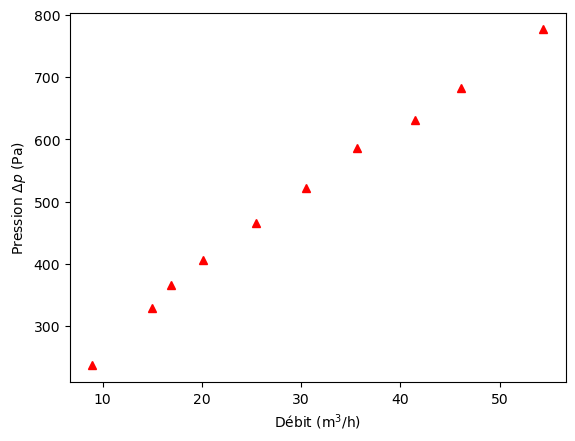

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# on lit la donneee
data=pd.read_csv('./infiltrometrie.csv')

# on regarde ce qu'il y a dedans
print(data)
# il s'agit de la mesure de pression et de debit suite a un test d'infiltrometrie (blower door test)
plt.plot(data['debit'], data['pression'],'r^')
plt.xlabel(r"Débit (m$^3$/h)")
plt.ylabel("Pression $\Delta p$ (Pa)")

On sait que le débit d'infiltration est donné par la relation suivante, qui comporte une part turbulente et une part laminaire : 
$Q_v = K_l \Delta p + K_t \sqrt{\Delta p}$



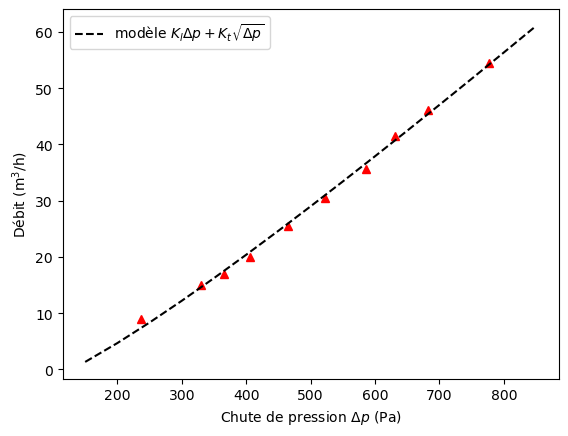

In [3]:
plt.plot(data['pression'], data['debit'], 'r^')
plt.xlabel("Chute de pression $\Delta p$ (Pa)")
plt.ylabel(r"Débit (m$^3$/h)")


# on définit la fonction qui donne le debit en fonction de la perte de charge 
def fc_modele_infiltrometrie(dp, Kl, Kt):
    qv = Kl * np.sqrt(dp) + Kt *dp
    return  qv

# on lit les donnees mesurees
dp_xp= data['pression'].values
qv_xp= data['debit'].values

# on cherche les paramètres Kl, Kt qui minimisent l'écart avec les mesures avec "curve_fit" de scipy
params , covariance = curve_fit(fc_modele_infiltrometrie, dp_xp, qv_xp)
Klam, Ktur = params

# ensuite on trace les valeurs de débit pour vérifier graphiquement le résultat
dp = np.arange(150,900,50)
qv_modele = fc_modele(dp, Klam, Ktur)
plt.plot(dp,qv_modele, 'k--' , label=r"modèle $K_l \Delta p + K_t \sqrt{\Delta p}$")
plt.legend()

*Remarque* : dans le cas où le modèle est "compliqué" et que `curve_fit` ne converge pas, on peut ajouter des contraintes sur les valeurs limites que peuvent prendre les paramètres avec un tuplue comme `bounds=((-10,-10,),(10,10))`.


## Application - Constante de refroidissement d'un local

<span style="color:green"> *À vous de jouer : On vous donne les valeurs de température d'un local qui se refroidit au cours du temps. L'équation gouvernante est $T(t) = T_e  + (T_0 - T_e) e^{-t\frac{US}{mC_p}}$. Trouvez la valeur de $mC_p$, la capacité thermique du local.* </span>

À vous de jouer, avec l'ébauche ci-dessous :

Text(0, 0.5, 'Température (°C)')

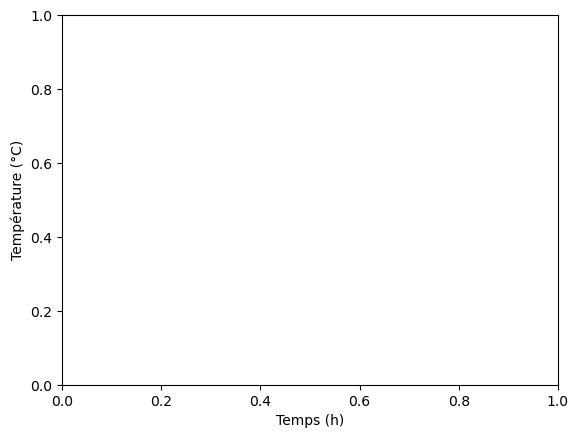

In [6]:
# les imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# la fonction dont le parametre est à approximer
def fc_modele(t, mCp):
    US = 30
    Te,T0=-5,20
    return Te + (T0-Te)*np.exp(-t*US/mCp)


# les mesures de température au fil du temps
t_xp = [0,2,4,5,7,10]
T_xp = [20, 18.4, 17.5, 16.5, 16, 14.2]
# on les trace pour voir... ?
# ... 
plt.xlabel("Temps (h)")
plt.ylabel(r"Température (°C)")


On devrait trouver une capacité thermique de l'ordre de $mC_p \sim 1200$.